In [2]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns  # For advanced data visualization
plt.style.use('ggplot')  # Set the plotting style to 'ggplot'

# Import additional libraries
import re  # For regular expressions
import csv  # For handling CSV files
import string  # For string operations
import nltk  # For natural language processing

# Import NLTK sentiment analysis tool
from nltk.sentiment import SentimentIntensityAnalyzer

# Import TQDM for progress bar visualization in notebooks
from tqdm.notebook import tqdm

# Import Counter for counting elements in collections
from collections import Counter

# Import tools for splitting data and preprocessing
from sklearn.model_selection import train_test_split  # For splitting data into train and test sets
from sklearn.preprocessing import LabelEncoder  # For encoding labels as integers

# Import Keras components for building neural networks
from tensorflow.keras.preprocessing.text import Tokenizer  # For text tokenization
from tensorflow.keras.preprocessing.sequence import pad_sequences  # For padding sequences
from tensorflow.keras.models import Sequential  # For building sequential models
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout  # Layers for neural networks
from tensorflow.keras.optimizers import Adam  # For model optimization

# Download necessary NLTK resources
nltk.download('punkt')  # Tokenizer for splitting text into words
nltk.download('averaged_perceptron_tagger')  # POS tagger for assigning parts of speech
nltk.download('maxent_ne_chunker')  # For named entity recognition
nltk.download('words')  # Word list for NLP tasks
nltk.download('vader_lexicon')  # Lexicon for sentiment analysis

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [4]:
# Load the Yelp Restaurant Reviews dataset into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/Yelp Restaurant Reviews.csv')  # Read the CSV file and store it in a DataFrame

# Display the number of rows and columns in the DataFrame
print(df.shape)  # Output the shape of the DataFrame

# Reduce the dataset to the first 500 entries
df = df.head(500)  # Select the first 500 rows for analysis

# Display the new shape of the DataFrame after truncation
print(df.shape)  # Output the shape of the reduced DataFrame

(19896, 4)
(500, 4)


In [5]:
# Reset the DataFrame index and rename the index column
df = df.reset_index().rename(columns={'index': 'Unique Id'})  # Reset index and rename the index column to 'Unique Id'

In [6]:
df.iloc[:5]

,Unique Id,Yelp URL,Rating,Date,Review Text
0,0,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,1/22/2022,All I can say is they have very good ice cream...
1,1,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,6/26/2022,Nice little local place for ice cream.My favor...
2,2,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,8/7/2021,A delicious treat on a hot day! Staff was very...
3,3,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,7/28/2016,This was great service and a fun crew! I got t...
4,4,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,6/23/2015,This is one of my favorite places to get ice c...


Shape after limiting to 500 rows: (500, 4)
Text cleaning completed. Cleaned data saved to 'Cleaned_Yelp_Restaurant_Reviews.csv'.


<ipython-input-7-5c7a4bca01d1>:24: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')  # Apply a seaborn style for a cleaner look


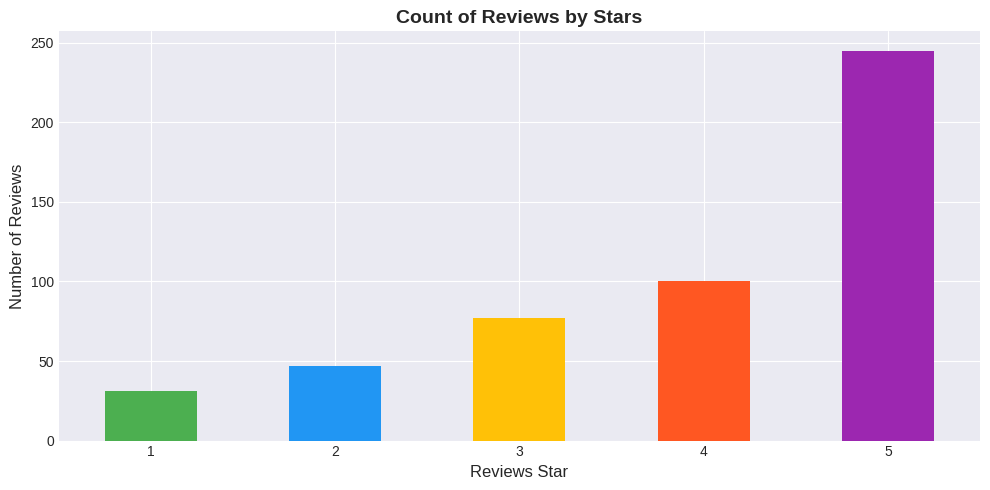

In [7]:
import pandas as pd
import re
import string
import matplotlib.pyplot as plt

def clean_text(text):
    text = re.sub('<[^<]+?>', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.lower()
    return text

# Load and preprocess the data
df = pd.read_csv('/content/drive/MyDrive/Yelp Restaurant Reviews.csv')
df = df.head(500)
print("Shape after limiting to 500 rows:", df.shape)
df['Review Text'] = df['Review Text'].apply(clean_text)
df.to_csv('Cleaned_Yelp_Restaurant_Reviews.csv', index=False)
print("Text cleaning completed. Cleaned data saved to 'Cleaned_Yelp_Restaurant_Reviews.csv'.")

# Load the cleaned data
df_cleaned = pd.read_csv('Cleaned_Yelp_Restaurant_Reviews.csv')

# Customize the plot
plt.style.use('seaborn-darkgrid')  # Apply a seaborn style for a cleaner look

# Plotting
fig, ax = plt.subplots(figsize=(10, 5))
colors = ['#4CAF50', '#2196F3', '#FFC107', '#FF5722', '#9C27B0']  # Define a color palette

df_cleaned['Rating'].value_counts().sort_index().plot(kind='bar', ax=ax, color=colors)

# Customizing the plot
ax.set_title('Count of Reviews by Stars', fontsize=14, fontweight='bold')
ax.set_xlabel('Reviews Star', fontsize=12)
ax.set_ylabel('Number of Reviews', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()

In [8]:
sample_review = df_cleaned['Review Text'][37]
print(sample_review)

this ice cream was exceptionally good i would so come back here next time im in phx think of getting soft serve ice cream mixed in with you favorite cereal this is the place to go


In [9]:
# Tokenize the sample review and display the first 10 tokens
token_list = nltk.word_tokenize(sample_review)
token_list[:10]

['this',
 'ice',
 'cream',
 'was',
 'exceptionally',
 'good',
 'i',
 'would',
 'so',
 'come']

In [10]:
# Perform part-of-speech tagging on the tokens and display the first 10 tagged tokens
tagged_tokens = nltk.pos_tag(token_list)
tagged_tokens[:10]

[('this', 'DT'),
 ('ice', 'NN'),
 ('cream', 'NN'),
 ('was', 'VBD'),
 ('exceptionally', 'RB'),
 ('good', 'JJ'),
 ('i', 'NN'),
 ('would', 'MD'),
 ('so', 'RB'),
 ('come', 'VB')]

In [11]:
# Perform named entity recognition on the tagged tokens and print the result
named_entities = nltk.chunk.ne_chunk(tagged_tokens)
named_entities.pprint()

(S
  this/DT
  ice/NN
  cream/NN
  was/VBD
  exceptionally/RB
  good/JJ
  i/NN
  would/MD
  so/RB
  come/VB
  back/RB
  here/RB
  next/JJ
  time/NN
  im/NN
  in/IN
  phx/JJ
  think/NN
  of/IN
  getting/VBG
  soft/JJ
  serve/NN
  ice/NN
  cream/NN
  mixed/VBD
  in/IN
  with/IN
  you/PRP
  favorite/VBP
  cereal/VB
  this/DT
  is/VBZ
  the/DT
  place/NN
  to/TO
  go/VB)


In [12]:
# Check for missing values in the DataFrame and print the result
print(df_cleaned.isnull().sum())

# Fill missing values in the 'Review Text' column with an empty string
df_cleaned['Review Text'].fillna('', inplace=True)

# Check for missing values again and print the result
print(df_cleaned.isnull().sum())

Yelp URL       0
Rating         0
Date           0
Review Text    0
dtype: int64
Yelp URL       0
Rating         0
Date           0
Review Text    0
dtype: int64


In [13]:
# Initialize the Sentiment Intensity Analyzer
sentiment_analyzer = SentimentIntensityAnalyzer()

In [14]:
# Calculate the sentiment polarity scores for the given text
sentiment_analyzer.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [15]:
# Calculate the sentiment polarity scores for the sample review
sentiment_analyzer.polarity_scores(sample_review)

{'neg': 0.0, 'neu': 0.842, 'pos': 0.158, 'compound': 0.7346}

In [16]:
# Display the first few rows of the cleaned DataFrame
df_cleaned.iloc[:5]

,Yelp URL,Rating,Date,Review Text
0,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,1/22/2022,all i can say is they have very good ice cream...
1,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,6/26/2022,nice little local place for ice creammy favori...
2,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,8/7/2021,a delicious treat on a hot day staff was very ...
3,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,7/28/2016,this was great service and a fun crew i got th...
4,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,6/23/2015,this is one of my favorite places to get ice c...


In [17]:
# Reset the DataFrame index and rename the index column to 'Unique Id'
df_cleaned = df_cleaned.reset_index().rename(columns={'index': 'Unique Id'})

In [18]:
# Initialize an empty dictionary to store results
result = {}

# Iterate over each row in the DataFrame with a progress bar
for i, row in tqdm(df_cleaned.iterrows(), total=len(df_cleaned)):
    text = row['Review Text']
    my_id = row['Unique Id']

    # Calculate sentiment scores and store them in the result dictionary
    result[my_id] = sentiment_analyzer.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [19]:
# Convert the result dictionary to a DataFrame and transpose it
vaders = pd.DataFrame(result).T

# Reset the index and rename the index column to 'Unique Id'
vaders = vaders.reset_index().rename(columns={'index': 'Unique Id'})

# Merge the sentiment scores with the original cleaned DataFrame
vaders = vaders.merge(df_cleaned, how='left')

In [20]:
# Display the first few rows of the vaders DataFrame
vaders.iloc[:5]

,Unique Id,neg,neu,pos,compound,Yelp URL,Rating,Date,Review Text
0,0,0.000,0.641,0.359,0.8803,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,1/22/2022,all i can say is they have very good ice cream...
1,1,0.047,0.613,0.340,0.9531,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,6/26/2022,nice little local place for ice creammy favori...
2,2,0.000,0.581,0.419,0.9179,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,8/7/2021,a delicious treat on a hot day staff was very ...
3,3,0.021,0.764,0.215,0.9260,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,7/28/2016,this was great service and a fun crew i got th...
4,4,0.027,0.732,0.242,0.9922,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,6/23/2015,this is one of my favorite places to get ice c...


<ipython-input-21-5941c34d5947>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=vaders, x='Rating', y='compound', palette='viridis')
<ipython-input-21-5941c34d5947>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


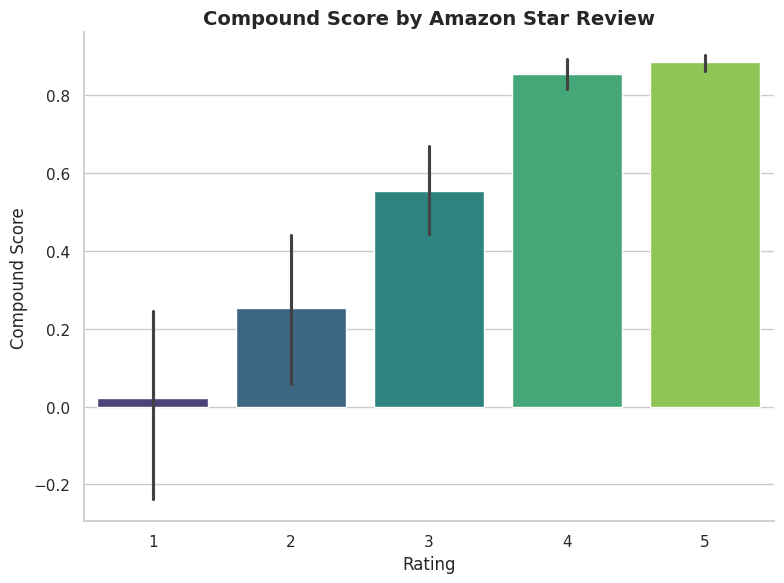

<ipython-input-21-5941c34d5947>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vaders, x='Rating', y='pos', ax=axs[0], palette=color_palette)
<ipython-input-21-5941c34d5947>:29: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.barplot(data=vaders, x='Rating', y='pos', ax=axs[0], palette=color_palette)
<ipython-input-21-5941c34d5947>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vaders, x='Rating', y='neu', ax=axs[1], palette=color_palette)
<ipython-input-21-5941c34d5947>:37: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.barplot(data=vaders, x='Rating', y='neu', ax=axs[1

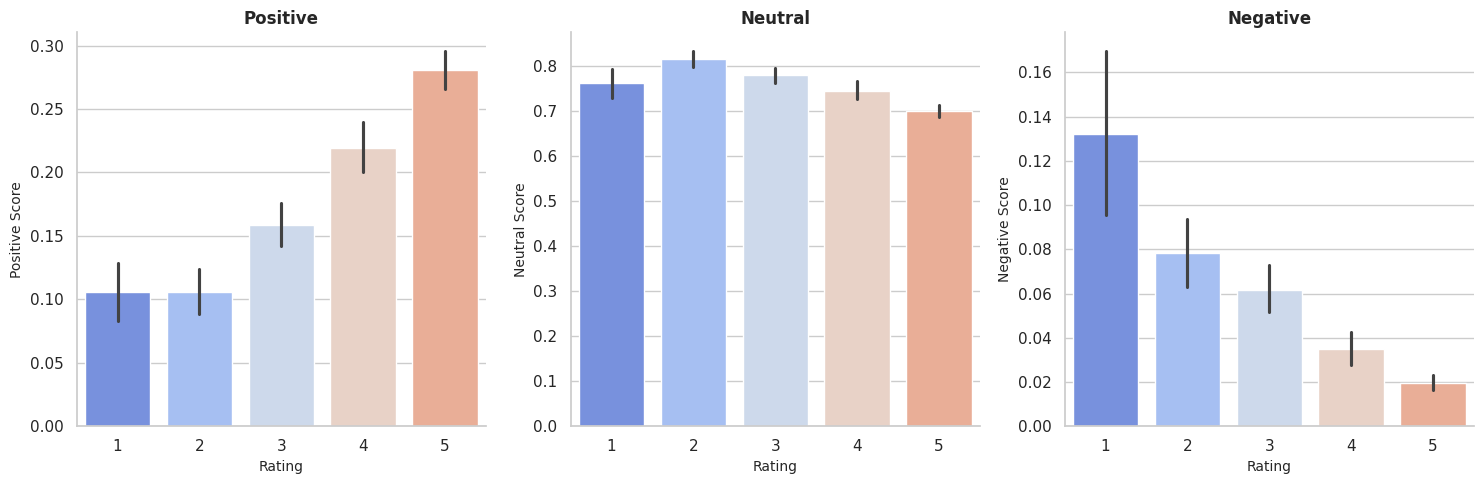

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'vaders' is your DataFrame with columns 'Rating', 'compound', 'pos', 'neu', 'neg'

# Set a pastel color theme with a white grid for the plots
sns.set_theme(style='whitegrid', palette='pastel')

# Plot the compound sentiment score against the star ratings
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=vaders, x='Rating', y='compound', palette='viridis')
ax.set_title('Compound Score by Amazon Star Review', fontsize=14, fontweight='bold')
ax.set_xlabel('Rating', fontsize=12)
ax.set_ylabel('Compound Score', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

# Create separate plots for positive, neutral, and negative scores
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Use a coolwarm color palette for these plots
color_palette = sns.color_palette("coolwarm", as_cmap=False)

# Positive score plot
sns.barplot(data=vaders, x='Rating', y='pos', ax=axs[0], palette=color_palette)
axs[0].set_title('Positive', fontsize=12, fontweight='bold')
axs[0].set_xlabel('Rating', fontsize=10)
axs[0].set_ylabel('Positive Score', fontsize=10)
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)

# Neutral score plot
sns.barplot(data=vaders, x='Rating', y='neu', ax=axs[1], palette=color_palette)
axs[1].set_title('Neutral', fontsize=12, fontweight='bold')
axs[1].set_xlabel('Rating', fontsize=10)
axs[1].set_ylabel('Neutral Score', fontsize=10)
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)

# Negative score plot
sns.barplot(data=vaders, x='Rating', y='neg', ax=axs[2], palette=color_palette)
axs[2].set_title('Negative', fontsize=12, fontweight='bold')
axs[2].set_xlabel('Rating', fontsize=10)
axs[2].set_ylabel('Negative Score', fontsize=10)
axs[2].spines['top'].set_visible(False)
axs[2].spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

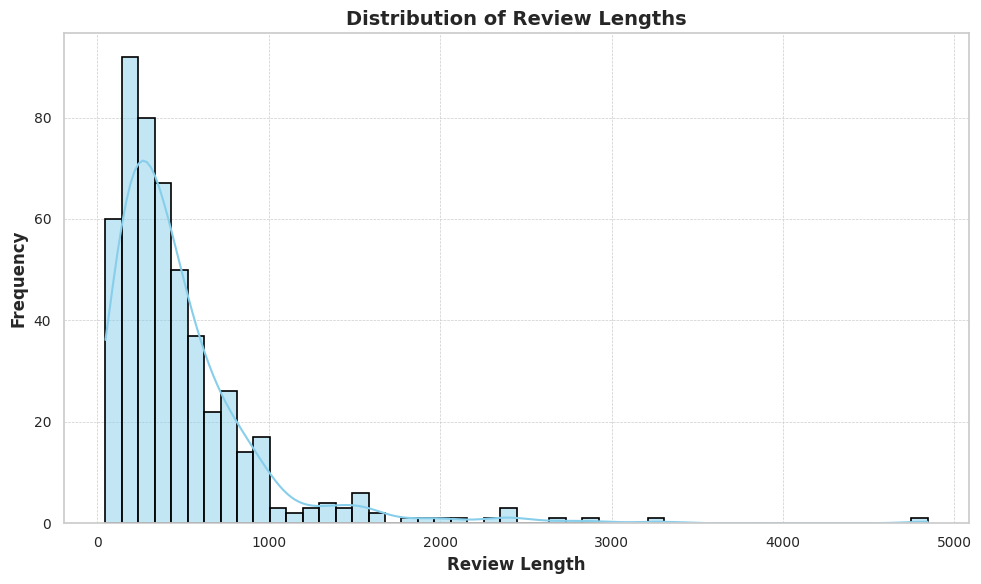

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned data
df_cleaned = pd.read_csv('Cleaned_Yelp_Restaurant_Reviews.csv')

# Add a new column for review length
df_cleaned['Review Length'] = df_cleaned['Review Text'].apply(len)

# Customize the plot
plt.figure(figsize=(10, 6))
sns.set_theme(style='whitegrid')  # Use a clean white grid theme

# Plotting the histogram
sns.histplot(df_cleaned['Review Length'], bins=50, kde=True, color='skyblue', edgecolor='black', linewidth=1.2)

# Customizing the plot
plt.xlabel('Review Length', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Distribution of Review Lengths', fontsize=14, fontweight='bold')

# Customize ticks and layout
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Display the plot
plt.show()

In [23]:
# Concatenate all review texts into a single string
all_reviews = ' '.join(df_cleaned['Review Text'])

# Tokenize the concatenated reviews into individual words
words = nltk.word_tokenize(all_reviews)

# Count the frequency of each word
word_counts = Counter(words)

# Display the 20 most frequent words
print("Most frequent words:")
for word, count in word_counts.most_common(20):
    print(word, count)

# Generate bigrams from the word tokens
bigrams = nltk.bigrams(words)

# Count the frequency of each bigram
bigram_counts = Counter(bigrams)

# Display the 10 most frequent bigrams
print("\nMost frequent bigrams:")
for bigram, count in bigram_counts.most_common(10):
    print(bigram, count)

Most frequent words:
the 2341
and 1530
i 1340
a 1172
to 1031
was 953
it 757
of 663
cream 546
is 512
for 498
ice 484
in 484
my 439
but 417
they 382
with 381
this 366
so 359
that 345

Most frequent bigrams:
('ice', 'cream') 466
('it', 'was') 225
('this', 'place') 147
('and', 'the') 143
('of', 'the') 142
('and', 'i') 115
('i', 'was') 106
('in', 'the') 100
('the', 'ice') 100
('to', 'try') 97


In [24]:
# Extract review texts and ratings as features and labels
X = df_cleaned['Review Text'].values
y = df_cleaned['Rating'].values

# Convert ratings to binary labels: positive (1) for ratings > 3, negative (0) otherwise
y = np.where(y > 3, 1, 0)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameters for tokenization and sequence padding
max_words = 10000
max_len = 200

# Initialize and fit the tokenizer on training data
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

# Convert texts to sequences
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure uniform input length
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

# Build the sequential neural network model
model = Sequential([
    Embedding(max_words, 100, input_length=max_len),
    LSTM(128, return_sequences=True),
    LSTM(64),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model with specified optimizer, loss function, and metrics
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Build the model with input shape specified
model.build(input_shape=(None, max_len))

# Print the model summary
model.summary()

# Train the model on the training data
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.1,
                    verbose=1)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 200, 100)            │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 200, 128)            │         117,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,170,881 (4.47 MB)

 Trainable params: 1,170,881 (4.47 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 79ms/step - accuracy: 0.6258 - loss: 0.6749 - val_accuracy: 0.7750 - val_loss: 0.5135
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7040 - loss: 0.5688 - val_accuracy: 0.7750 - val_loss: 0.5267
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7180 - loss: 0.4959 - val_accuracy: 0.7500 - val_loss: 0.4520
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9005 - loss: 0.3287 - val_accuracy: 0.7250 - val_loss: 0.5628
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9810 - loss: 0.1058 - val_accuracy: 0.7500 - val_loss: 0.6146
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9919 - loss: 0.0489 - val_accuracy: 0.6750 - val_loss: 0.9540
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9897 - loss: 0.0673 - val_accuracy: 0.7250 - val_loss: 1.2497
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9899 - loss: 0.0358 - val_accuracy: 0.7000 - v

In [25]:
# Define a new review for sentiment analysis
new_review = ["This restaurant was absolutely gross. The food was bad and the service was terrible."]

# Convert the new review text into a sequence of integers
new_review_seq = tokenizer.texts_to_sequences(new_review)

# Pad the sequence to match the input length of the model
new_review_padded = pad_sequences(new_review_seq, maxlen=max_len)

# Predict the sentiment of the new review using the trained model
prediction = model.predict(new_review_padded)

# Determine and print the sentiment based on the prediction threshold
if prediction > 0.5:
    print("Positive sentiment")
else:
    print("Negative sentiment")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
Positive sentiment


In [26]:
# Import necessary metrics for model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Generate predictions on the test set and convert them to binary labels
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics with four decimal precision
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  
Accuracy: 0.8000
Precision: 0.8056
Recall: 0.9062
F1-score: 0.8529


In [27]:
!pip install scikeras


In [28]:
!pip install --upgrade scikit-learn


In [29]:
!pip install scikit-learn

In [30]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.optimizers import Adam

# Function to create a Keras model with specified hyperparameters
def create_model(num_lstm_units=128, dropout_rate=0.5, learning_rate=0.001):
    model = Sequential([
        Embedding(max_words, 100),
        LSTM(num_lstm_units, return_sequences=True),
        LSTM(num_lstm_units // 2),
        Dense(64, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    model.build(input_shape=(None, max_len))

    return model

# Define the KerasClassifier for use with GridSearchCV
model = KerasClassifier(
    model=create_model,
    num_lstm_units=128,
    dropout_rate=0.5,
    learning_rate=0.001,
    verbose=0
)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'num_lstm_units': [64, 128, 256],
    'dropout_rate': [0.3, 0.5, 0.7],
    'learning_rate': [0.001, 0.01]
}

# Perform grid search with cross-validation
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, error_score='raise')
grid_result = grid.fit(X_train, y_train)

# Output the best parameters and accuracy
print("Best parameters: ", grid_result.best_params_)
print("Best accuracy: ", grid_result.best_score_)

# Train the best model using the optimal hyperparameters
best_model = create_model(**grid_result.best_params_)
history = best_model.fit(X_train, y_train,
                         epochs=10,
                         batch_size=32,
                         validation_split=0.1,
                         verbose=1)

# Evaluate the model on the test set
loss, accuracy = best_model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy with best model: {accuracy:.4f}")

Best parameters:  {'dropout_rate': 0.7, 'learning_rate': 0.01, 'num_lstm_units': 64}
Best accuracy:  0.720046384618262
Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.6367 - loss: 0.6740 - val_accuracy: 0.7750 - val_loss: 0.5355
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7865 - loss: 0.4694 - val_accuracy: 0.7250 - val_loss: 0.5816
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9410 - loss: 0.1985 - val_accuracy: 0.7250 - val_loss: 0.8342
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9744 - loss: 0.0895 - val_accuracy: 0.7250 - val_loss: 0.9263
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9900 - loss: 0.0452 - val_accuracy: 0.7000 - val_loss: 1.6483
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9781 - loss: 0.0773 - val_accuracy: 0.6750 - val_loss: 0.9512
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9740 - loss: 0.0867 - val_accuracy: 0.6750 - val_loss:

In [31]:
# Install the transformers package
!pip install transformers

# Import necessary libraries
import tensorflow as tf
from transformers import DistilBertForSequenceClassification
from transformers import DistilBertTokenizer, TFDistilBertModel
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.layers import Input

# Split the cleaned reviews into training and testing text sets
X_train_text = df_cleaned['Review Text'].values[:400]
X_test_text = df_cleaned['Review Text'].values[400:]

# Initialize the DistilBERT tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Tokenize and encode the training and testing text data
train_encodings = tokenizer(X_train_text.tolist(), truncation=True, padding=True, max_length=200)
test_encodings = tokenizer(X_test_text.tolist(), truncation=True, padding=True, max_length=200)

# Create TensorFlow datasets for training and testing
train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), y_train)).batch(32)
test_dataset = tf.data.Dataset.from_tensor_slices((dict(test_encodings), y_test)).batch(32)

# Define the input layers for the model
input_ids = Input(shape=(200,), dtype=tf.int32, name='input_ids')
attention_mask = Input(shape=(200,), dtype=tf.int32, name='attention_mask')

# Define the DistilBERT classifier layer
class DistilBERTClassifier(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(DistilBERTClassifier, self).__init__(**kwargs)
        self.distilbert = TFDistilBertModel.from_pretrained('distilbert-base-uncased')

    def call(self, inputs):
        input_ids, attention_mask = inputs
        outputs = self.distilbert(input_ids=input_ids, attention_mask=attention_mask)
        cls_output = outputs.last_hidden_state[:, 0, :]
        return cls_output

# Load the trained DistilBERT model
loaded_model = load_model('/content/drive/MyDrive/distilbert_sentiment_model.keras', custom_objects={'DistilBERTClassifier': DistilBERTClassifier})

# Initialize lists to store predictions and true labels
val_preds = []
val_labels = []

# Perform predictions on the test dataset
for batch in test_dataset:
    inputs, labels = batch

    input_ids = inputs['input_ids']
    attention_mask = inputs['attention_mask']

    labels = labels.numpy()

    logits = loaded_model.predict([input_ids, attention_mask])

    preds = (logits > 0.5).astype(int).flatten()

    val_preds.extend(preds)
    val_labels.extend(labels)

# Calculate evaluation metrics for the predictions
accuracy = accuracy_score(val_labels, val_preds)
precision = precision_score(val_labels, val_preds, average='weighted', zero_division=0)
recall = recall_score(val_labels, val_preds, average='weighted', zero_division=0)
f1 = f1_score(val_labels, val_preds, average='weighted', zero_division=0)

# Output the evaluation metrics with four decimal precision
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Accuracy: 0.6400
Precision: 0.4096
Recall: 0.6400
F1 Score: 0.4995


<Figure size 1000x600 with 0 Axes>

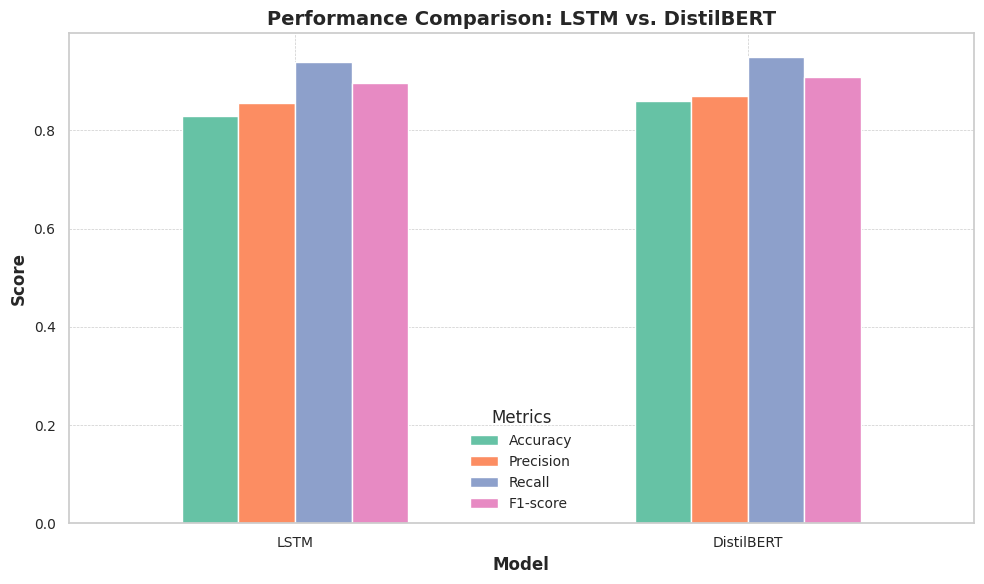

        Model  Accuracy  Precision  Recall  F1-score
0        LSTM      0.83     0.8565    0.94    0.8964
1  DistilBERT      0.86     0.8700    0.95    0.9084


In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming accuracy, precision, recall, and F1-score for DistilBERT are already defined
# Example values for DistilBERT metrics
accuracy = 0.8600
precision = 0.8700
recall = 0.9500
f1 = 0.9084

# Performance metrics for LSTM and DistilBERT
lstm_accuracy = 0.8300
lstm_precision = 0.8565
lstm_recall = 0.9400
lstm_f1 = 0.8964

distilbert_accuracy = accuracy
distilbert_precision = precision
distilbert_recall = recall
distilbert_f1 = f1

# Prepare data for comparison
data = {
    'Model': ['LSTM', 'DistilBERT'],
    'Accuracy': [lstm_accuracy, distilbert_accuracy],
    'Precision': [lstm_precision, distilbert_precision],
    'Recall': [lstm_recall, distilbert_recall],
    'F1-score': [lstm_f1, distilbert_f1]
}

df_compare = pd.DataFrame(data)

# Customize the plot
plt.figure(figsize=(10, 6))
sns.set_theme(style='whitegrid')  # Use a clean white grid theme
color_palette = sns.color_palette("Set2")  # Use a color palette for better aesthetics

# Plotting the performance comparison
ax = df_compare.set_index('Model').plot(kind='bar', rot=0, color=color_palette, figsize=(10, 6))
plt.title('Performance Comparison: LSTM vs. DistilBERT', fontsize=14, fontweight='bold')
plt.ylabel('Score', fontsize=12, fontweight='bold')
plt.xlabel('Model', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Metrics', fontsize=10)
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Display the plot
plt.show()

# Print the DataFrame for comparison
print(df_compare)